In [38]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
plt.style.use('seaborn-whitegrid')

matplotlib.rcParams['figure.dpi']=300 #high resulation display

## Basic Nural Network:

A neural network having 

$$x^{l+1}_m = \sigma\left(\sum_{i=0}^{n}w_{im}x^{l}_i + b^{l+1}_m\right) $$

In vector notaion

$$x^{l+1} = \sigma(Wx^l+b^{l+1}) $$

 __W__: wight matrix:


 $x^l_n$:  neuron _n_ value of layer  _l_ 


### Neural Network with just one layer (No hidden layer)

In [39]:
#the non linear function that we are sui
def sigmoid(z):
    return 1./(1+np.exp(-z))

#fucntion to calculate next neuron layer given previous layer
def apply_layer(x):
    global weight, bias
    z = np.dot(weight, x) + bias
    x_out = sigmoid(z)
    return x_out


In [24]:
N1 = 2 #size of input layer
N2 = 1 #size of output layer
x1 = np.random.uniform(0, 1, size=(N1,1)) #giving random inputs
weight = np.random.normal(0,1, size=(N2,N1)) #random weights
bias = np.random.normal(0, 1, size=(N2,1))  #random bias
x2 = apply_layer(x1)
print(x2)

[[0.35583504]]


#### Visulisation of the network

The simple method is to measure output for different values of input pairs 

In [40]:
def cartitian_product(a,b):
    a_x_b = np.zeros((len(a)*len(b), 2))
    x,y = np.meshgrid(a,b)
    a_x_b[:,0] = x.flatten()
    a_x_b[:,1] = y.flatten()

    return a_x_b

In [26]:
batch_size = 50

x = np.linspace(-5, 5, batch_size)
y = np.linspace(-5, 5, batch_size)

input_samples = cartitian_product(x,y)
output_samples = np.array([apply_layer(i) for i in input_samples])

In [27]:
y0 = output_samples[:,0, 0].reshape((batch_size, batch_size))
# y1 = output_samples[:, 1, 0].reshape((batch_size, batch_size))

/tmp/ipykernel_8925/1252304265.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


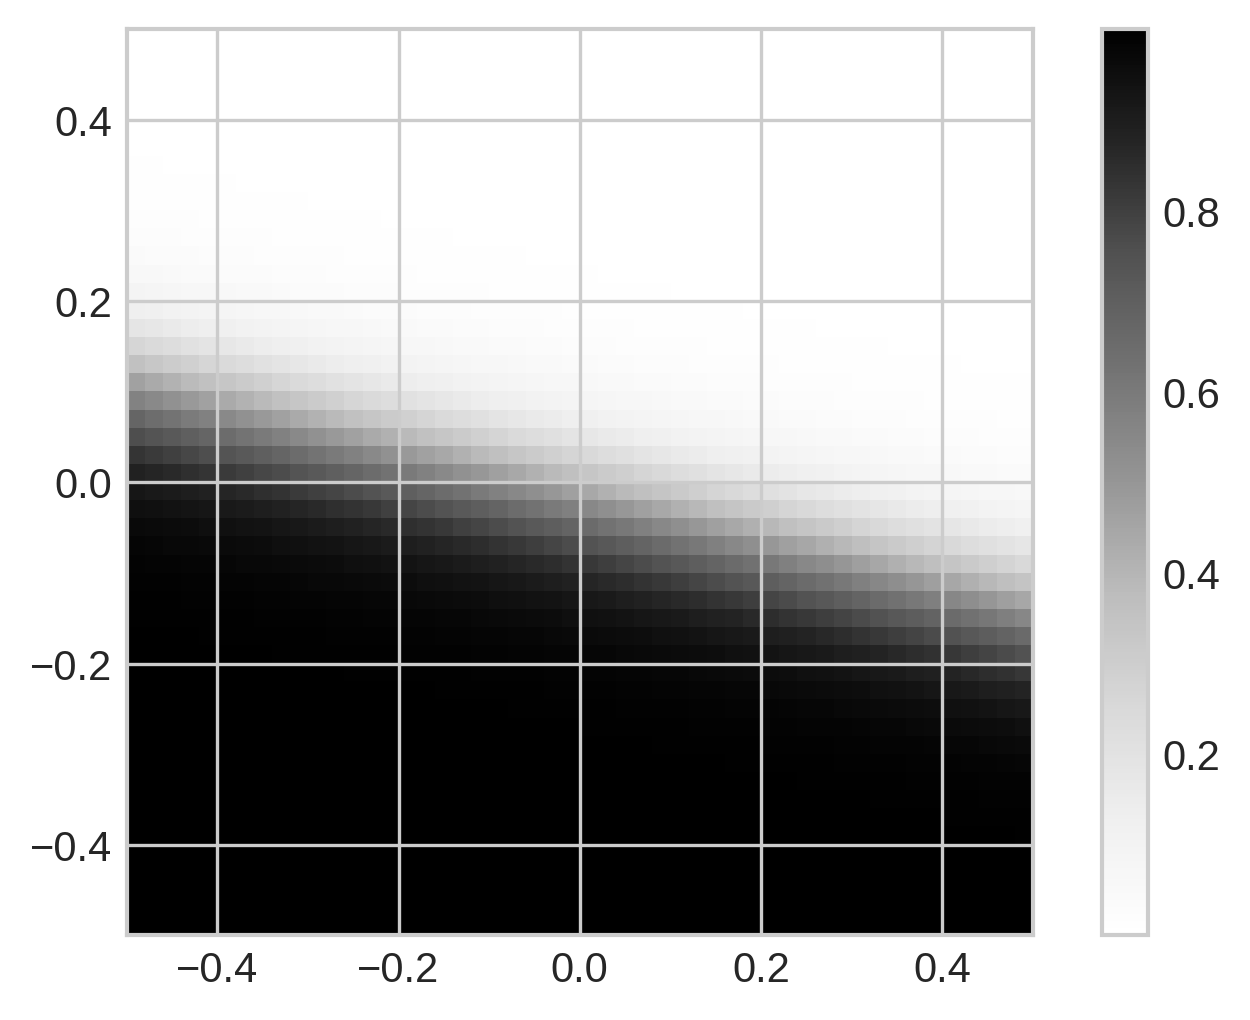

In [28]:
plt.imshow(y0,origin='lower', extent=(-0.5,0.5,-0.5,0.5));
plt.colorbar();

### Many hidden Layers

let's take 10 hidden layers

In [41]:
hidden_layers = 30#numbers of hidden layers
N_hidden = 100 #number of neurons is hidden layer
N_in = 2 #number of input neurons
N_out = 1 #number of output neuron
total_layers = N_hidden+2

w0 = np.random.normal(0,1,size=(N_hidden, N_in)) #weight of input layer to first hidden layer
wl = np.random.normal(0,1,size=(N_out, N_hidden)) #weight of last hidden layer to output layer
b0 = np.random.normal(0,1,size=(N_hidden, 1))
if hidden_layers>1:
    w_hidden = np.random.normal(0,1,size=(hidden_layers-1, N_hidden, N_hidden)) #weights of hidden layers 
    b_hidden = np.random.normal(0,1,size=(hidden_layers-1, N_hidden, 1)) #biases of hidden layers
bl = np.random.normal(0, 1, size = (N_out, 1)) #bias of output layer

#applying layers bases on layer of previous and given weights and baises
def forward_step(y_in, w, b):
    z = np.dot(w, y_in)+b
    x_out = sigmoid(z)
    return x_out

#applying whole network at once
def apply_network(y_in):
    #first apply frist hidden layer
    y1 = forward_step(y_in, w0, b0)
    #apply hidden layers 
    ys = y1
    # print(y1.shape)
    for i in range(hidden_layers-1):
        w = w_hidden[i]
        b = b_hidden[i]
        ys = forward_step(ys, w, b)
        # print(ys.shape)
    #apply last layer
    # print(ys)
    y_out = forward_step(ys, wl, bl)

    return y_out

random_input_to_start = np.random.uniform(-1, 1, size=(2,1))

output = apply_network(random_input_to_start)
print(output)

[[1.21053474e-05]]


/tmp/ipykernel_17532/1364429296.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


Text(0.5, 1.0, 'Random neural Network with 30 hidden layers')

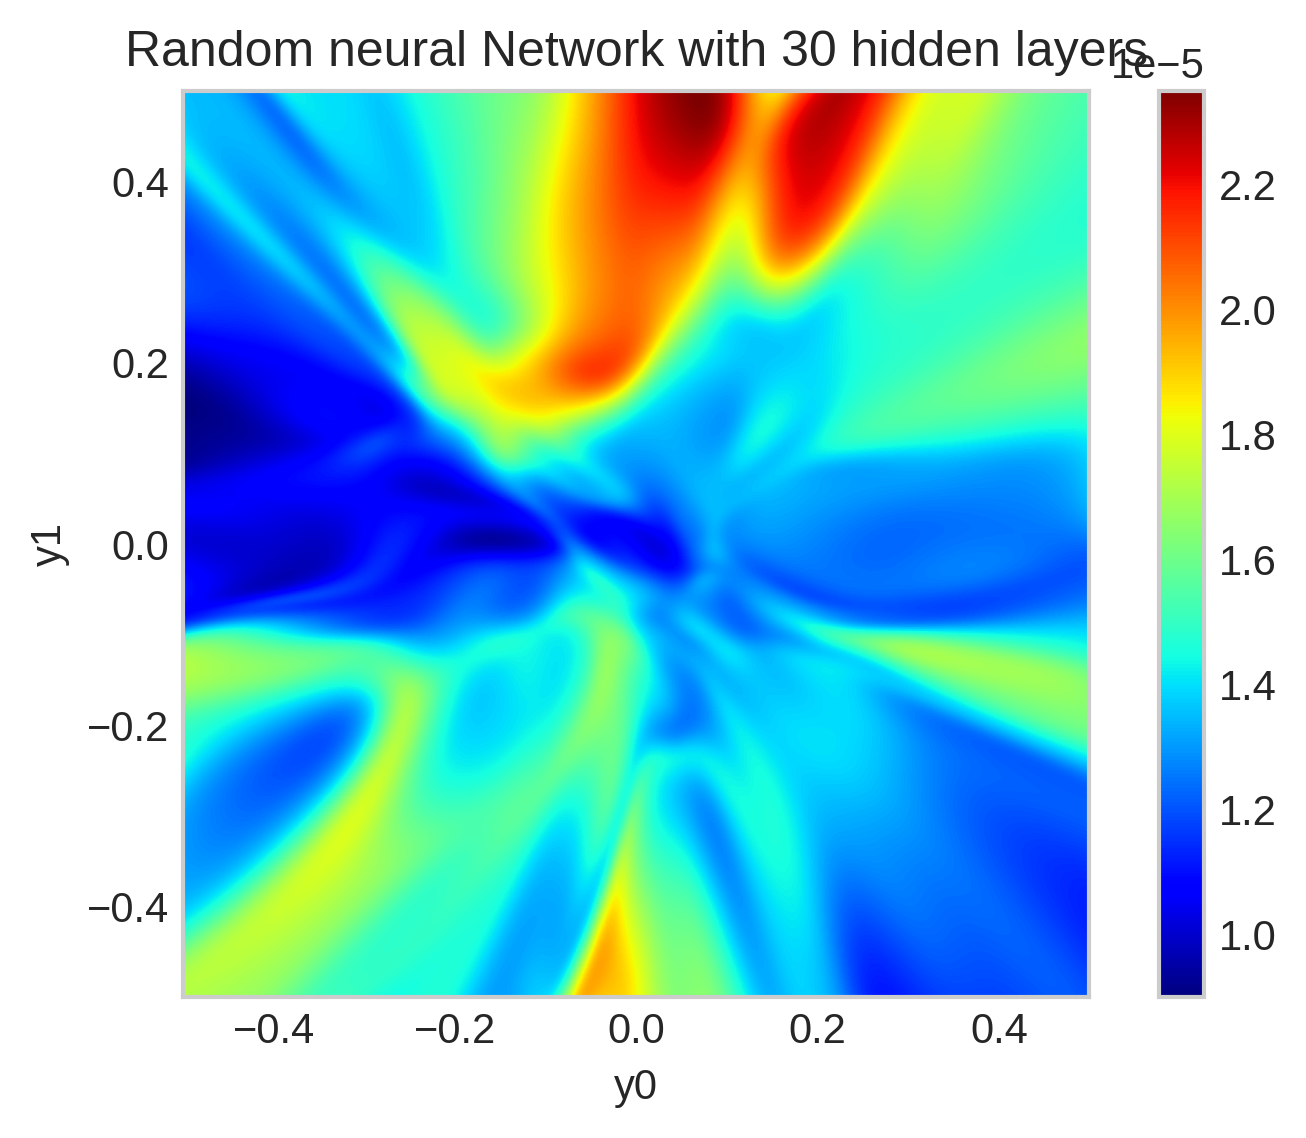

In [43]:
batch_size = 500

x = np.linspace(-5, 5, batch_size)
y = np.linspace(-5, 5, batch_size)

input_samples = cartitian_product(x,y)

output_samples = np.array([apply_network(i.reshape((2,1))) for i in input_samples])
y0 = output_samples[:,0].reshape((batch_size, batch_size))

plt.imshow(y0,origin='lower', extent=(-0.5,0.5,-0.5,0.5), cmap='jet');
plt.grid(0)
plt.colorbar();
plt.xlabel('y0')
plt.ylabel('y1')
plt.title(f'Random neural Network with {hidden_layers} hidden layers')

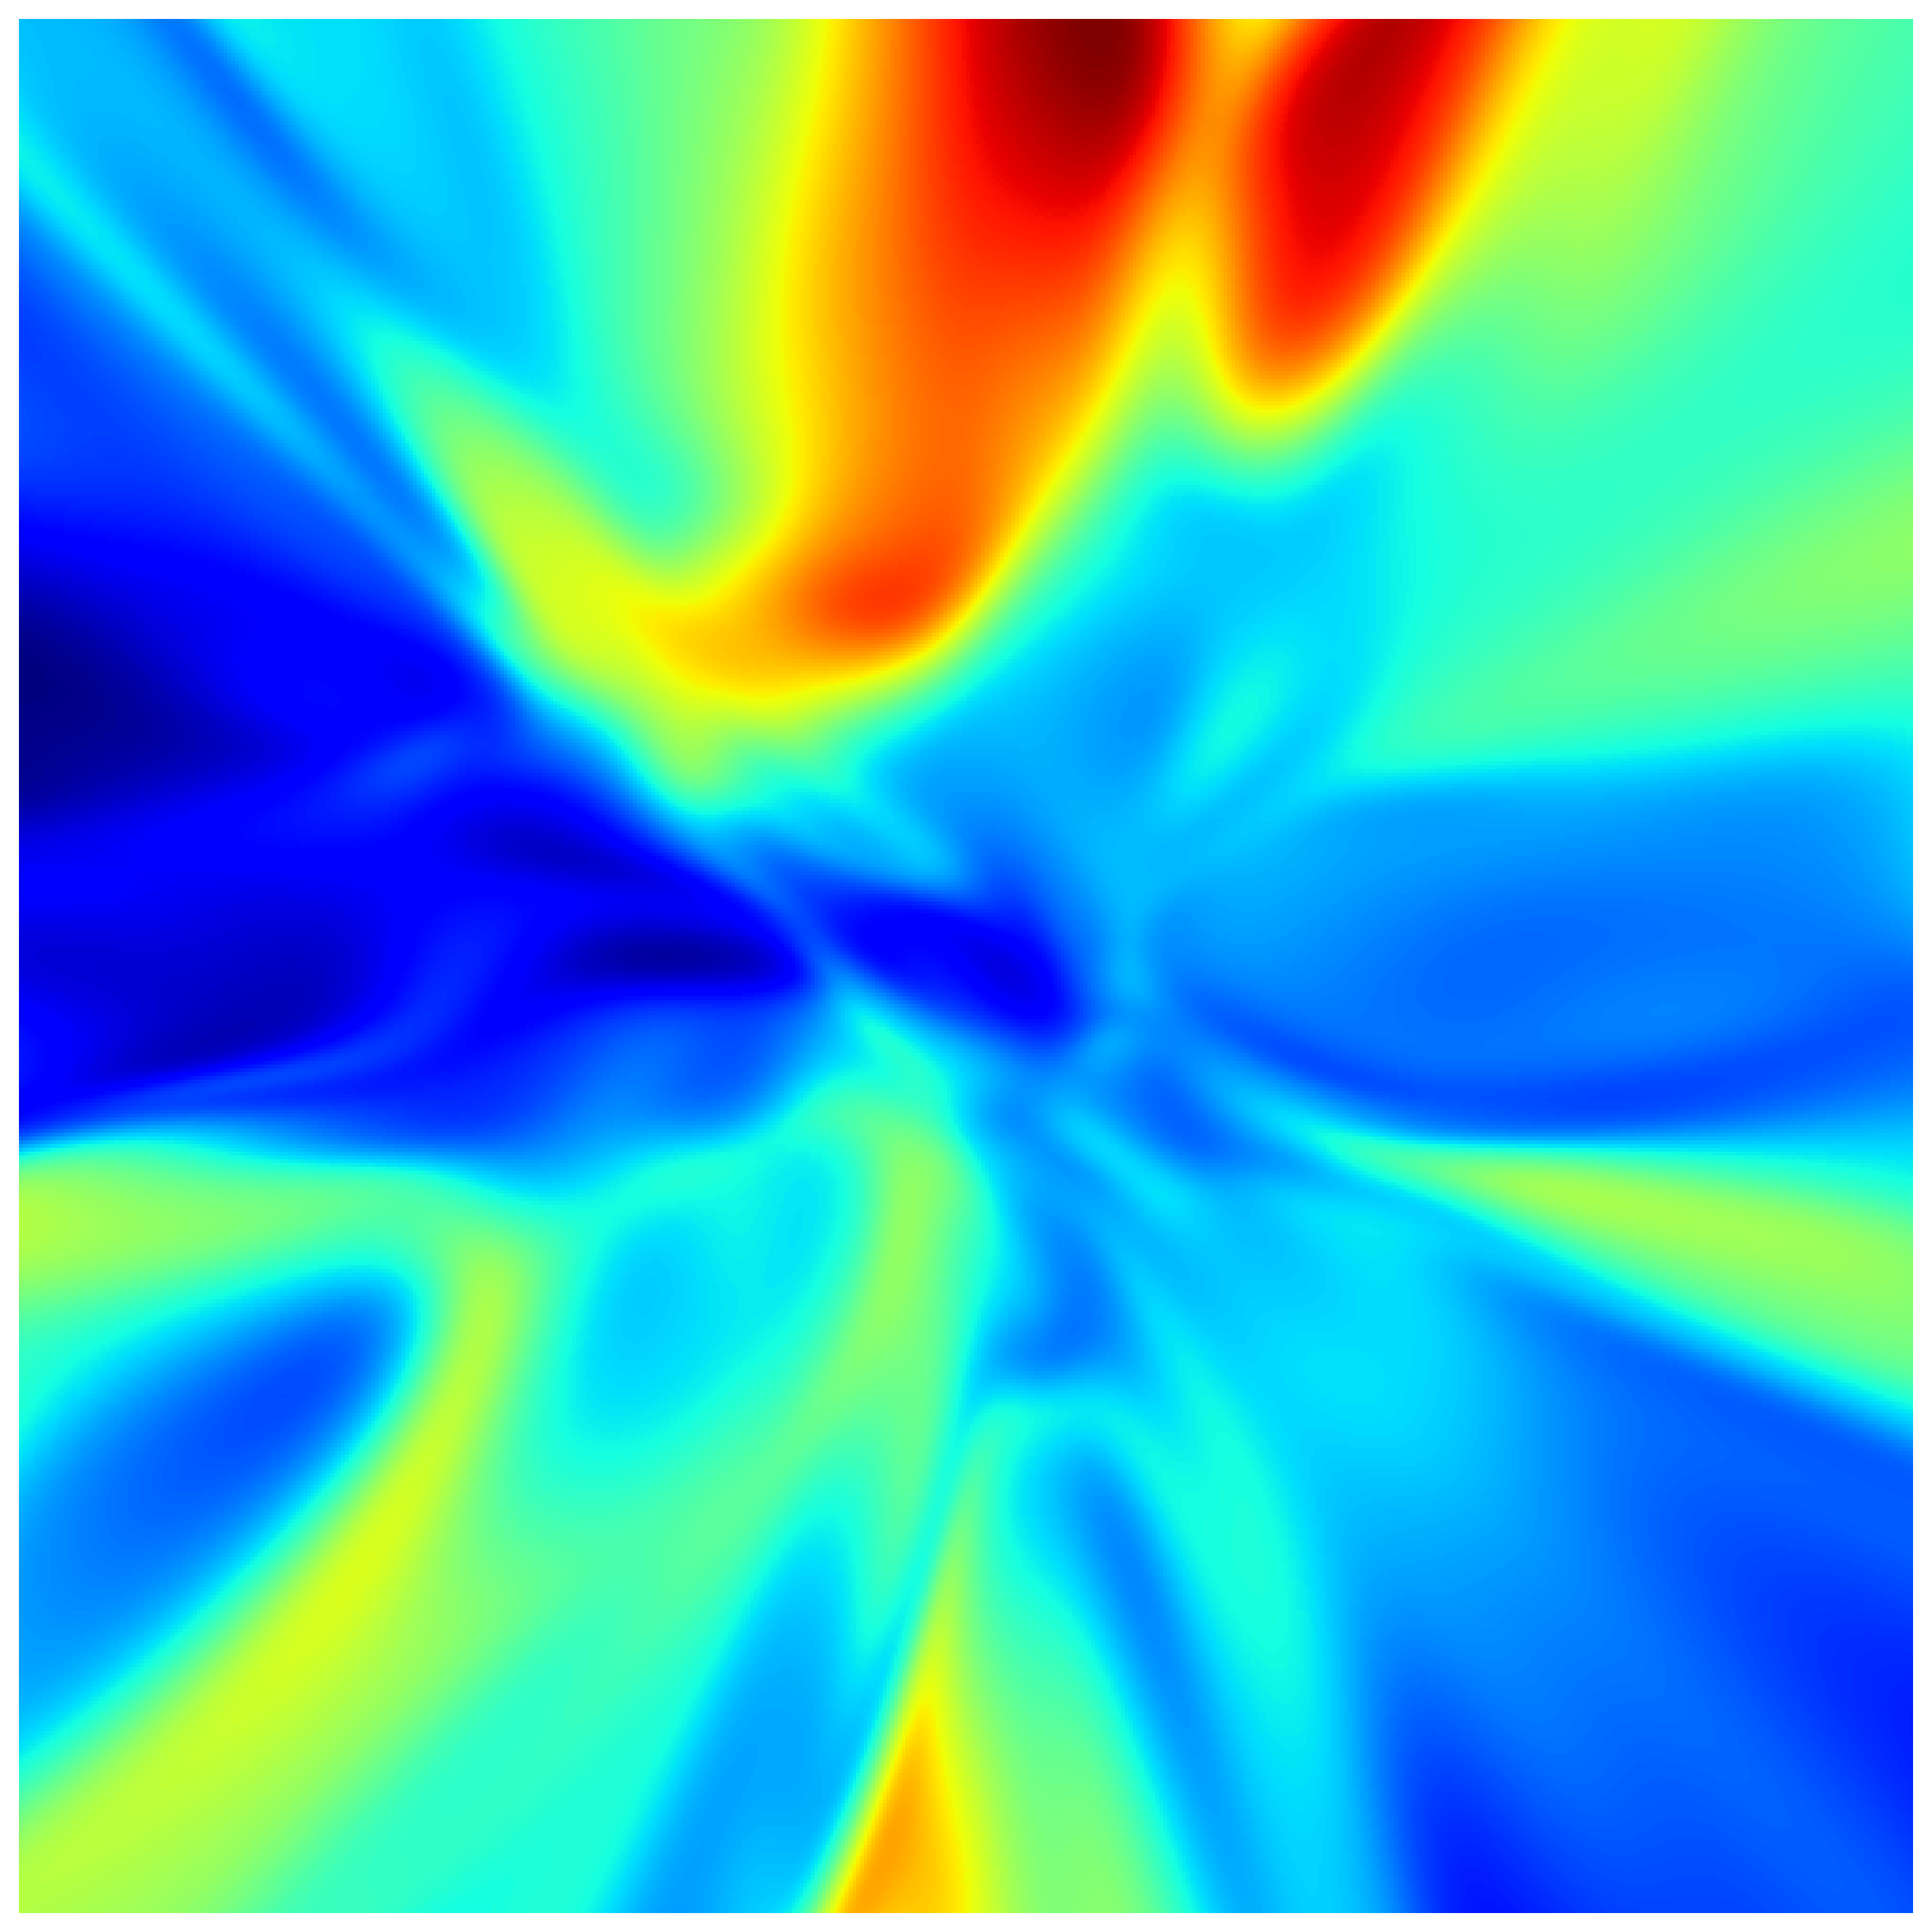

In [48]:
batch_size = 500

x = np.linspace(-5, 5, batch_size)
y = np.linspace(-5, 5, batch_size)

input_samples = cartitian_product(x,y)

output_samples = np.array([apply_network(i.reshape((2,1))) for i in input_samples])
y0 = output_samples[:,0].reshape((batch_size, batch_size))



plt.figure(figsize=[10,10])
plt.axes([0,0,1,1]) # fill all of the picture with the image
plt.imshow(y0,origin='lower',extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest', cmap='jet')
plt.axis('off') # no axes
plt.show()